### 1. Import librerys3

In [1]:
import tensorflow as tf
import os

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Remove dodgy images

In [3]:
import cv2
import imghdr

C:\Users\HP\AppData\Local\Temp\ipykernel_616\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints
Issue with image data\sad\.ipynb_checkpoints


### 3. Load Images

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 303 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
len(batch)

2

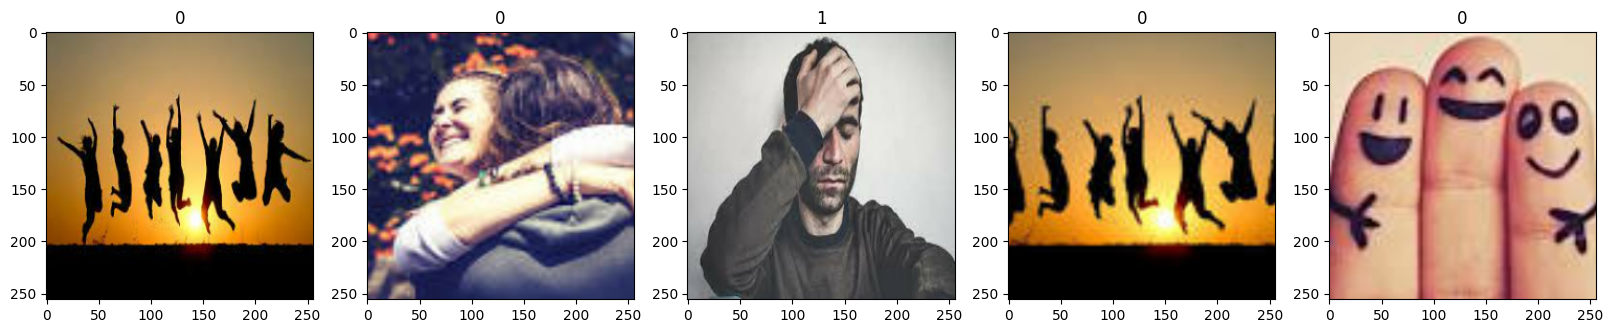

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 4. Scale Data

In [12]:
data = data.map(lambda x,y: (x/255, y))
#newrel network perform well data into 0 to 1 smaller the data faster the perfomace 

In [13]:
data.as_numpy_iterator().next()

(array([[[[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.9985907 , 0.7907475 , 0.24957108],
          [0.99215686, 0.7882353 , 0.25490198],
          ...,
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198],
          [0.99215686, 0.7882353 , 0.25490198]],
 
         ...,
 
         [[0.9900122 , 0.7903799 , 0.26525736],
          [0.99859

### 5. Split Data

In [14]:
train_size = int(len(data)*.7) #70% train
val_size = int(len(data)*.2) #20% validation
test_size = int(len(data)*.1)#10% test

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### 6. Build DeepLearing Model

In [18]:
from tensorflow.keras.models import Sequential #singl input and singl output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 7. Train

In [24]:
logdir = 'logs'

In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
hist = model.fit(train,epochs=25,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/25


7/7 [==============================] - 10s 876ms/step - loss: 1.1147 - accuracy: 0.5580 - val_loss: 0.7082 - val_accuracy: 0.4844
Epoch 2/25
7/7 [==============================] - 5s 532ms/step - loss: 0.6845 - accuracy: 0.5402 - val_loss: 0.6347 - val_accuracy: 0.7031
Epoch 3/25
7/7 [==============================] - 5s 507ms/step - loss: 0.5846 - accuracy: 0.7679 - val_loss: 0.5223 - val_accuracy: 0.7344
Epoch 4/25
7/7 [==============================] - 5s 523ms/step - loss: 0.4205 - accuracy: 0.8214 - val_loss: 0.4615 - val_accuracy: 0.7500
Epoch 5/25
7/7 [==============================] - 5s 506ms/step - loss: 0.2859 - accuracy: 0.9062 - val_loss: 0.2116 - val_accuracy: 0.9688
Epoch 6/25
7/7 [==============================] - 5s 513ms/step - loss: 0.1717 - accuracy: 0.9420 - val_loss: 0.0857 - val_accuracy: 0.9844
Epoch 7/25
7/7 [==============================] - 5s 513ms/step - loss: 0.2145 - accuracy: 0.9107 - val_loss: 0.0907 - val_accuracy: 1.0000
Epoch 8/25
7/7 [=

### 8. Evaluation

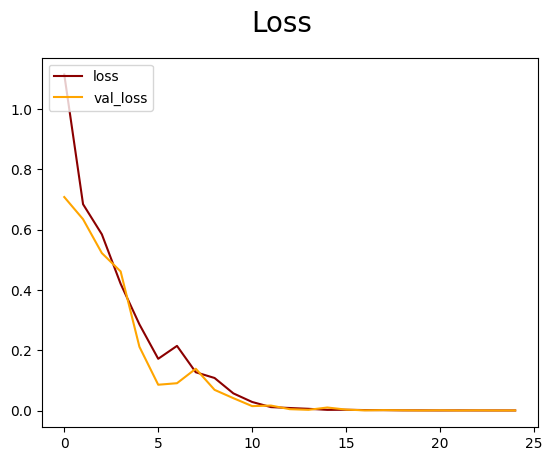

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='darkred', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', font size=20)
plt.legend(loc="upper left")
plt.show()

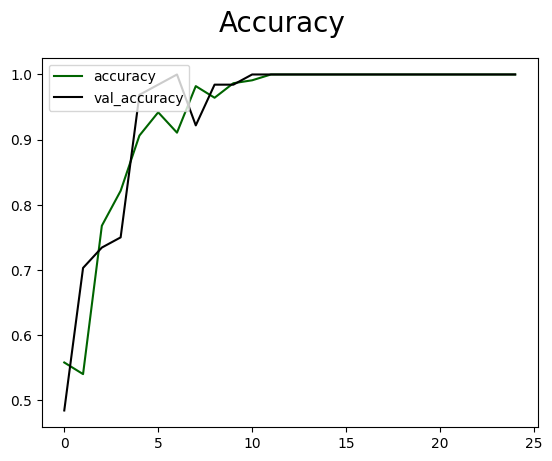

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='darkgreen', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='k', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
Pre = Precision()
Re = Recall()
Acc = BinaryAccuracy()

In [33]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    Pre.update_state(y, yhat)
    Re.update_state(y, yhat)
    Acc.update_state(y, yhat)

1/1 [==============================] - 0s 177ms/step


In [34]:
Pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [36]:
print(Re.result())

tf.Tensor(1.0, shape=(), dtype=float32)


In [37]:
print(Acc.result())

tf.Tensor(1.0, shape=(), dtype=float32)


### 9. Test

In [38]:
import cv2

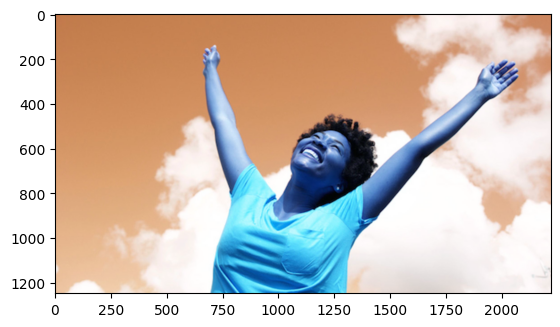

In [39]:
img = cv2.imread('istock-508455188.jpg')
plt.imshow(img)
plt.show()

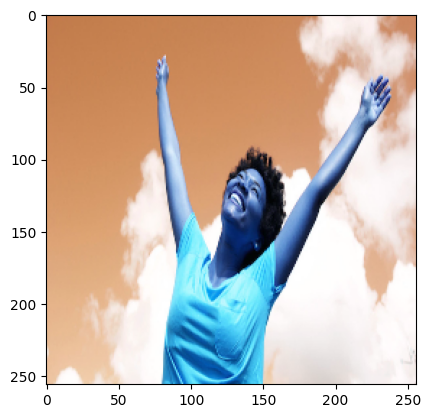

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 52ms/step


In [44]:
yhat

array([[0.10008585]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


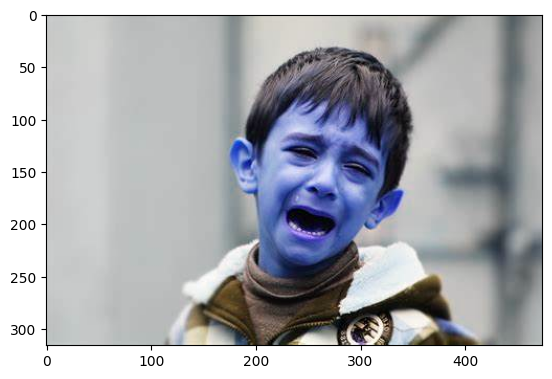

In [46]:
img = cv2.imread('sadimg.jpg')
plt.imshow(img)
plt.show()

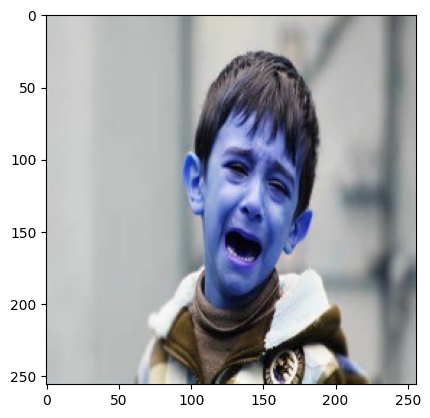

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [49]:
yhat

array([[0.99853295]], dtype=float32)

In [50]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### 10. Save The Model

In [54]:
model.save(os.path.join('models','image_classifier_models.h5'))